# Extract features from the dataset

In [1]:
import json
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import networkx as nx
import numpy as np


In [2]:

# crate a list to add dataframes to
awsc_list = list()

# list of files
files_list = ['../Datasets/event_history.json']

# Load event names
category_file = open("../Utils/event_category.json")
event_categories = json.load(category_file)
category_file.close()

encoder = OneHotEncoder(handle_unknown='ignore')
label_encoder = LabelEncoder()

In [3]:
starts_with_di = {
    'CreateObject': ['request','create','copy','run','purchase','allocate','import'],
    'ModifyExistingResource': ['modify','update','set','tag','deregister','Deprecate','un','reject','register'],
    'ListResources' : ['list'],
    'Download/UploadObjects': ['getobjects','upload'],
    'GetInfo': ['describe','get','search'],
    'AssociateResources' : ['associate','put'],
    'Login' : ['assume','login','switch','renewrole','renewdelegate'],
    'RemovePermissions': ['remove'],
    'GrantPermissions': ['add','authorize']

}

contains_di = {
    'Delete': ['delet','terminate','revoke','drop','releaseaddress'] ,
    'DisableObjects': ['disabl','stop','cancel','unlink','suspend'],
    'EnableObjects': ['enabl','start','invoke','subscribe','test','complete'],
    'SensitiveInfo': ['send','accesskey','secretkey','token','invite','exportapi'],
    'Logout': ['exit'],
    'CreateObject': ['create','copy'],
    'ModifyExistingResource': ['failover','change','confirm','promote','reboot','rotate','replace','retire','detach','modify','update','set','tag','deregister','Deprecate','attach','upgrade','wipe','transfer','validate','publish'],
    'ListResources' : ['list'],
    'Download/UploadObjects': ['getobjects','upload'],
    'GetInfo': ['describe','get','view'],
    'AssociateResources' : ['associate','put'],
    'Login' : ['assume','login','renewrole','sign','forgot'],
    'Logout' : ['logout']

}

In [4]:
for file in files_list:
    with open(file, 'r', encoding='utf-8') as f:
        data = json.loads(f.read())
        
        # Append the dataframes
        awsc_list.append(pd.DataFrame.from_records(data['Records']))

In [5]:
# Merge data frames into one 
awsc = pd.concat(awsc_list).reset_index(drop=True)

In [6]:
awsc

,eventVersion,userIdentity,eventTime,eventSource,eventName,awsRegion,sourceIPAddress,userAgent,requestParameters,responseElements,...,tlsDetails,requestID,apiVersion,errorCode,errorMessage,resources,sharedEventID,sessionCredentialFromConsole,serviceEventDetails,vpcEndpointId
0,1.08,"{'type': 'IAMUser', 'principalId': 'AIDAUWCGWF...",2022-12-04T21:19:38Z,signin.amazonaws.com,ConsoleLogin,us-east-1,147.235.194.59,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,None,{'ConsoleLogin': 'Success'},...,"{'tlsVersion': 'TLSv1.2', 'cipherSuite': 'ECDH...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.08,"{'type': 'AssumedRole', 'principalId': 'AROAUW...",2022-12-04T20:51:17Z,iam.amazonaws.com,CreateAccessKey,us-east-1,35.173.2.36,aws-sdk-php/3.237.2 OS/Linux/4.14.294-220.533....,{'userName': 'cloud_user'},"{'accessKey': {'userName': 'cloud_user', 'acce...",...,"{'tlsVersion': 'TLSv1.2', 'cipherSuite': 'ECDH...",a65aa5b0-4043-4630-a6c6-c415d1bd2867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.08,"{'type': 'AssumedRole', 'principalId': 'AROAUW...",2022-12-04T20:51:07Z,ec2.amazonaws.com,CreateDefaultVpc,us-east-1,52.90.85.137,Boto3/1.20.32 Python/3.7.13 Linux/4.14.255-285...,{'CreateDefaultVpcRequest': ''},{'CreateDefaultVpcResponse': {'xmlns': 'http:/...,...,"{'tlsVersion': 'TLSv1.2', 'cipherSuite': 'ECDH...",bdf4a0c2-2be5-4e68-8346-248e199d8680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.08,"{'type': 'AssumedRole', 'principalId': 'AROAUW...",2022-12-04T20:51:05Z,logs.amazonaws.com,CreateLogGroup,us-east-1,52.90.85.137,awslambda-worker/1.0 rusoto/0.48.0 rust/1.65.0...,{'logGroupName': '/aws/lambda/cfst-1449-6903da...,None,...,"{'tlsVersion': 'TLSv1.2', 'cipherSuite': 'ECDH...",8f1fb9cb-447b-46e8-a185-8ef9fc536b00,20140328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.08,"{'type': 'AssumedRole', 'principalId': 'AROAUW...",2022-12-04T20:51:05Z,logs.amazonaws.com,CreateLogStream,us-east-1,52.90.85.137,awslambda-worker/1.0 rusoto/0.48.0 rust/1.65.0...,{'logGroupName': '/aws/lambda/cfst-1449-6903da...,None,...,"{'tlsVersion': 'TLSv1.2', 'cipherSuite': 'ECDH...",03029fbc-8367-4cd7-89bc-ed1fe6022978,20140328,ResourceNotFoundException,The specified log group does not exist.,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99735,1.08,"{'type': 'AWSService', 'invokedBy': 'ssm.amazo...",2022-09-06T00:12:08Z,sts.amazonaws.com,AssumeRole,us-east-1,ssm.amazonaws.com,ssm.amazonaws.com,{'roleArn': 'arn:aws:iam::322270801872:role/aw...,{'credentials': {'accessKeyId': 'ASIAUWCGWF7IG...,...,NaN,524dcd8e-95e3-495d-9805-6959fd1a52b0,NaN,NaN,NaN,"[{'accountId': '322270801872', 'type': 'AWS::I...",95c960d0-7619-4c7d-a7a4-1a478486f7cd,NaN,NaN,NaN
99736,1.08,"{'type': 'AWSService', 'invokedBy': 'ssm.amazo...",2022-09-06T00:11:58Z,sts.amazonaws.com,AssumeRole,us-east-1,ssm.amazonaws.com,ssm.amazonaws.com,{'roleArn': 'arn:aws:iam::322270801872:role/aw...,{'credentials': {'accessKeyId': 'ASIAUWCGWF7IL...,...,NaN,d80ef66c-54bf-45ef-a818-a1b401cfacf2,NaN,NaN,NaN,"[{'accountId': '322270801872', 'type': 'AWS::I...",d46d997f-d1b4-4b82-acf5-632e3a270e73,NaN,NaN,NaN
99737,1.08,"{'type': 'AWSService', 'invokedBy': 'ssm.amazo...",2022-09-05T23:19:11Z,sts.amazonaws.com,AssumeRole,us-east-1,ssm.amazonaws.com,ssm.amazonaws.com,{'roleArn': 'arn:aws:iam::322270801872:role/aw...,{'credentials': {'accessKeyId': 'ASIAUWCGWF7IH...,...,NaN,2a807a6e-27fe-4b67-b5c4-9e1f0ad73ff3,NaN,NaN,NaN,"[{'accountId': '322270801872', 'type': 'AWS::I...",8454be00-a2a1-4201-bfe5-5ddc2876c8cc,NaN,NaN,NaN
99738,1.08,"{'type': 'AWSService', 'invokedBy': 'ssm.amazo...",2022-09-05T23:19:06Z,sts.amazonaws.com,AssumeRole,us-east-1,ssm.amazonaws.com,ssm.amazonaws.com,{'roleArn': 'arn:aws:iam::322270801872:role/aw...,{'credentials': {'accessKeyId': 'ASIAUWCGWF7IL...,...,NaN,c84e79fd-f671-4a48-a609-8278dd983bef,NaN,NaN,NaN,"[{'accountId': '322270801872', 'type': 'AWS::I...",1b16083c-6568-4551-8914-8f3059edfa20,NaN,NaN,NaN


In [7]:
users = pd.json_normalize(awsc['userIdentity']).merge(awsc[['eventTime','eventName','eventSource','awsRegion','errorCode']], left_index=True,right_index=True)

In [8]:
users['userName'] = users['userName'].fillna(users['arn']).fillna(users['invokedBy']) \
.fillna(users['invokedBy']).fillna(users['principalId'])

In [9]:
users = users[['eventTime','type','userName','eventName','eventSource','awsRegion','errorCode']]
users = users.rename(columns = {'eventTime':'timestamp','userName':'Identifier','eventSource':'TargetService','errorCode':'Error'})


In [10]:
users.head()


,timestamp,type,Identifier,eventName,TargetService,awsRegion,Error
0,2022-12-04T21:19:38Z,IAMUser,cloud_user,ConsoleLogin,signin.amazonaws.com,us-east-1,NaN
1,2022-12-04T20:51:17Z,AssumedRole,arn:aws:sts::322270801872:assumed-role/admin/a...,CreateAccessKey,iam.amazonaws.com,us-east-1,NaN
2,2022-12-04T20:51:07Z,AssumedRole,arn:aws:sts::322270801872:assumed-role/cfst-14...,CreateDefaultVpc,ec2.amazonaws.com,us-east-1,NaN
3,2022-12-04T20:51:05Z,AssumedRole,arn:aws:sts::322270801872:assumed-role/cfst-14...,CreateLogGroup,logs.amazonaws.com,us-east-1,NaN
4,2022-12-04T20:51:05Z,AssumedRole,arn:aws:sts::322270801872:assumed-role/cfst-14...,CreateLogStream,logs.amazonaws.com,us-east-1,ResourceNotFoundException


In [11]:
awsc.head()


,eventVersion,userIdentity,eventTime,eventSource,eventName,awsRegion,sourceIPAddress,userAgent,requestParameters,responseElements,...,tlsDetails,requestID,apiVersion,errorCode,errorMessage,resources,sharedEventID,sessionCredentialFromConsole,serviceEventDetails,vpcEndpointId
0,1.08,"{'type': 'IAMUser', 'principalId': 'AIDAUWCGWF...",2022-12-04T21:19:38Z,signin.amazonaws.com,ConsoleLogin,us-east-1,147.235.194.59,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,None,{'ConsoleLogin': 'Success'},...,"{'tlsVersion': 'TLSv1.2', 'cipherSuite': 'ECDH...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.08,"{'type': 'AssumedRole', 'principalId': 'AROAUW...",2022-12-04T20:51:17Z,iam.amazonaws.com,CreateAccessKey,us-east-1,35.173.2.36,aws-sdk-php/3.237.2 OS/Linux/4.14.294-220.533....,{'userName': 'cloud_user'},"{'accessKey': {'userName': 'cloud_user', 'acce...",...,"{'tlsVersion': 'TLSv1.2', 'cipherSuite': 'ECDH...",a65aa5b0-4043-4630-a6c6-c415d1bd2867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.08,"{'type': 'AssumedRole', 'principalId': 'AROAUW...",2022-12-04T20:51:07Z,ec2.amazonaws.com,CreateDefaultVpc,us-east-1,52.90.85.137,Boto3/1.20.32 Python/3.7.13 Linux/4.14.255-285...,{'CreateDefaultVpcRequest': ''},{'CreateDefaultVpcResponse': {'xmlns': 'http:/...,...,"{'tlsVersion': 'TLSv1.2', 'cipherSuite': 'ECDH...",bdf4a0c2-2be5-4e68-8346-248e199d8680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.08,"{'type': 'AssumedRole', 'principalId': 'AROAUW...",2022-12-04T20:51:05Z,logs.amazonaws.com,CreateLogGroup,us-east-1,52.90.85.137,awslambda-worker/1.0 rusoto/0.48.0 rust/1.65.0...,{'logGroupName': '/aws/lambda/cfst-1449-6903da...,None,...,"{'tlsVersion': 'TLSv1.2', 'cipherSuite': 'ECDH...",8f1fb9cb-447b-46e8-a185-8ef9fc536b00,20140328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.08,"{'type': 'AssumedRole', 'principalId': 'AROAUW...",2022-12-04T20:51:05Z,logs.amazonaws.com,CreateLogStream,us-east-1,52.90.85.137,awslambda-worker/1.0 rusoto/0.48.0 rust/1.65.0...,{'logGroupName': '/aws/lambda/cfst-1449-6903da...,None,...,"{'tlsVersion': 'TLSv1.2', 'cipherSuite': 'ECDH...",03029fbc-8367-4cd7-89bc-ed1fe6022978,20140328,ResourceNotFoundException,The specified log group does not exist.,NaN,NaN,NaN,NaN,NaN


In [12]:
li = []
def change_name(name):
    if name in event_categories:
        return event_categories[name]
    for key,value in starts_with_di.items():
        for event_name in value:
            if name.lower().startswith(event_name):
                return key
    for key,value in contains_di.items():
        for event_name in value:
            if event_name in name.lower():
                return key
    li.append(name)

users['eventName'] = users['eventName'].apply(lambda name: change_name(name))

# users['eventName'] = pd.DataFrame({'eventName':encoder.fit_transform(users[['eventName']]).toarray().tolist()},)
# users = users.join(encoder_df)
# users = users.drop('eventName', axis=1)

In [13]:
users['timestamp'] = pd.to_datetime(users['timestamp']).map(pd.Timestamp.timestamp).map(int)
users = users.sort_values('timestamp',ascending=True,ignore_index=True)

In [14]:
users['identity-event'] = "source-"+users['Identifier'] + "|" + users['eventName']
users['event-region'] = users['eventName'] + "|" + users['awsRegion']
users['region-target'] = users['awsRegion'] + "|" + "target-"+ users['TargetService']

In [15]:
def get_time_df(start,end,minutes,df,col='timestamp'):
    minutes = minutes * 60
    df_list = []
    while start < end:
        cur_df = df[(df[col] >= start) & (df[col] < start+minutes)]
        if len(cur_df):
            df_list.append(df[(df[col] >= start) & (df[col] < start+minutes)])
        start+=minutes
    return df_list

In [16]:
users['Identifier'] = users['Identifier'].apply(lambda x : f"source-{x}")
users['TargetService'] = users['TargetService'].apply(lambda x : f"target-{x}")
df_list = get_time_df(users['timestamp'].iloc[0],users['timestamp'].iloc[-1],60,users)
for i in df_list:
    print(len(i))

3
12
3
2
2
385
676
401
331
361
5
3
7
806
452
8
3
4
485
642
374
339
430
9
10
2
5
1
3
6
2
877
376
6
1
3
740
497
425
350
281
10
31
793
8
1
20
7
3
29
782
473
349
354
278
2
5
8
35
1082
633
411
287
15
2
4
34
838
468
352
417
184
5
2
2
2
3
2
33
890
467
398
389
192
5
29
924
448
408
384
137
1
2
2
2
2
4
2
2
2
142
915
359
408
446
4
5
2
6
2
2
2
3
2
1
131
2
130
5
2
2
2
2
5
33
954
392
346
405
54
4
2
2
777
512
348
344
264
7
374
732
420
346
369
10
5
7
9
2
2
38
894
348
436
358
127
1
701
486
404
386
309
7
2
5
3
11
31
988
363
381
449
5
8
10
4
37
989
131
11
1
458
7
4
371
691
416
382
295
101
2
4
11
6
6
4
2
936
7
8
4
2
852
415
394
396
135
1
2
3
485
671
355
342
354
1
4
2
3
2
824
453
342
397
202
5
4
31
938
405
385
354
132
7
4
2
3
2
2
2
33
797
436
365
422
135
1
2
2
4
2
4
2
4
31
995
412
336
438
73
1
4
2
2
518
686
376
336
481
9
2
3
2
597
562
338
398
312
1
4
255
784
366
412
340
9
5
10
1
7
375
700
421
350
371
6
8
190
61
7
1
744
482
402
354
260
5
3
11
5
2
2
872
519
159
9
3
6
13
716
491
18
369
786
5
4
596
564
336
423

In [17]:
def add_nodes(g,df,col):
    unique_nodes = df[col].unique()
    for i in unique_nodes:
        g.add_node(f'{i}')

def add_edges(g,df,col):
    edges = df[col].value_counts()
    for node,value in edges.items():
        start_node,end_node = node.split('|')
        print(node)
        g.add_edge(start_node, end_node, weight=value)


def generate_graph(G,df):    
    add_nodes(G,df,'TargetService')
    add_nodes(G,df,'Identifier')
    add_nodes(G,df,'eventName')
    add_nodes(G,df,'awsRegion')
    add_edges(G,df,'identity-event')
    add_edges(G,df,'event-region')
    add_edges(G,df,'region-target')
    

In [18]:
G = nx.Graph()
generate_graph(G,df_list[1])

source-trustedadvisor.amazonaws.com|Login
source-securityhub.amazonaws.com|Login
source-ssm.amazonaws.com|Login
Login|us-east-1
us-east-1|target-sts.amazonaws.com


In [19]:
df_list[1]

,timestamp,type,Identifier,eventName,TargetService,awsRegion,Error,identity-event,event-region,region-target
3,1662423118,AWSService,source-ssm.amazonaws.com,Login,target-sts.amazonaws.com,us-east-1,NaN,source-ssm.amazonaws.com|Login,Login|us-east-1,us-east-1|target-sts.amazonaws.com
4,1662423128,AWSService,source-ssm.amazonaws.com,Login,target-sts.amazonaws.com,us-east-1,NaN,source-ssm.amazonaws.com|Login,Login|us-east-1,us-east-1|target-sts.amazonaws.com
5,1662423165,AWSService,source-securityhub.amazonaws.com,Login,target-sts.amazonaws.com,us-east-1,NaN,source-securityhub.amazonaws.com|Login,Login|us-east-1,us-east-1|target-sts.amazonaws.com
6,1662423666,AWSService,source-trustedadvisor.amazonaws.com,Login,target-sts.amazonaws.com,us-east-1,NaN,source-trustedadvisor.amazonaws.com|Login,Login|us-east-1,us-east-1|target-sts.amazonaws.com
7,1662423856,AWSService,source-trustedadvisor.amazonaws.com,Login,target-sts.amazonaws.com,us-east-1,NaN,source-trustedadvisor.amazonaws.com|Login,Login|us-east-1,us-east-1|target-sts.amazonaws.com
8,1662423856,AWSService,source-trustedadvisor.amazonaws.com,Login,target-sts.amazonaws.com,us-east-1,NaN,source-trustedadvisor.amazonaws.com|Login,Login|us-east-1,us-east-1|target-sts.amazonaws.com
9,1662423857,AWSService,source-trustedadvisor.amazonaws.com,Login,target-sts.amazonaws.com,us-east-1,NaN,source-trustedadvisor.amazonaws.com|Login,Login|us-east-1,us-east-1|target-sts.amazonaws.com
10,1662423877,AWSService,source-securityhub.amazonaws.com,Login,target-sts.amazonaws.com,us-east-1,NaN,source-securityhub.amazonaws.com|Login,Login|us-east-1,us-east-1|target-sts.amazonaws.com
11,1662424384,AWSService,source-securityhub.amazonaws.com,Login,target-sts.amazonaws.com,us-east-1,NaN,source-securityhub.amazonaws.com|Login,Login|us-east-1,us-east-1|target-sts.amazonaws.com
12,1662425886,AWSService,source-securityhub.amazonaws.com,Login,target-sts.amazonaws.com,us-east-1,NaN,source-securityhub.amazonaws.com|Login,Login|us-east-1,us-east-1|target-sts.amazonaws.com


{('target-sts.amazonaws.com',
  'us-east-1'): Text(0.5610420108183928, 0.4891699302318684, '12'),
 ('source-ssm.amazonaws.com',
  'Login'): Text(0.10195100775682017, -0.508222981969419, '2'),
 ('source-securityhub.amazonaws.com',
  'Login'): Text(-0.41326767978098117, 0.22780852448738378, '4'),
 ('source-trustedadvisor.amazonaws.com',
  'Login'): Text(-0.34843389716562206, -0.22520143668867101, '6'),
 ('Login', 'us-east-1'): Text(0.1309687402602716, 0.15878892081091278, '12')}

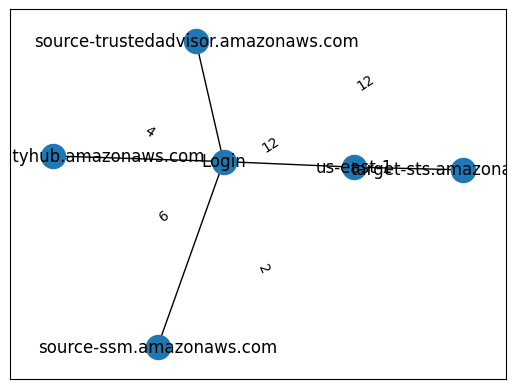

In [20]:

pos=nx.spring_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(G,with_labels=True)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)